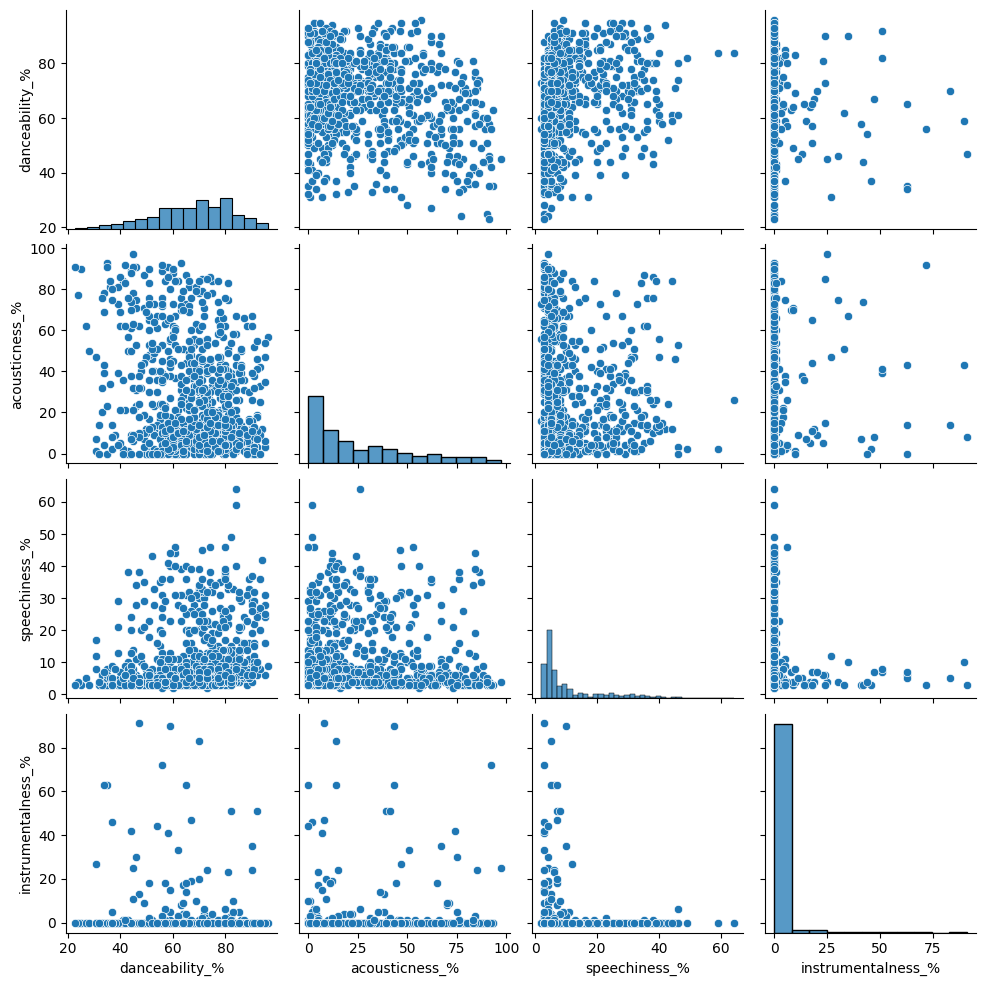

In [43]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Specify the file path
file_path = "spotify-2023.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
# df["danceability_p"]

df.dropna(inplace=True)
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


features = ['danceability_%', 'acousticness_%', 'speechiness_%', 'instrumentalness_%']
sns.pairplot(df[features])
plt.show()


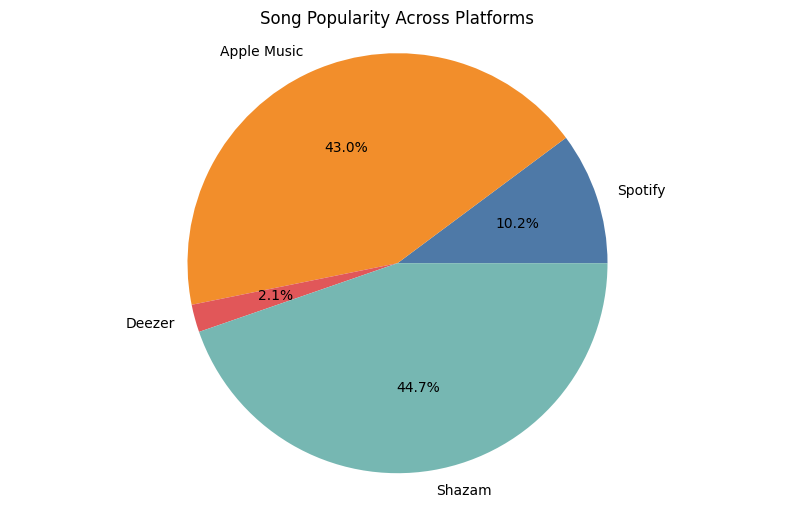

In [72]:
import matplotlib.pyplot as plt

# Assuming platform_totals dictionary is populated as in your example
platform_totals = {
    'Spotify': df['in_spotify_charts'].sum(),
    'Apple Music': df['in_apple_charts'].sum(),
    'Deezer': df['in_deezer_charts'].sum(),
    'Shazam': df['in_shazam_charts'].sum()
}

platforms = list(platform_totals.keys())
values = list(platform_totals.values())

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=platforms, autopct='%1.1f%%', colors=["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f"])
plt.title('Song Popularity Across Platforms')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


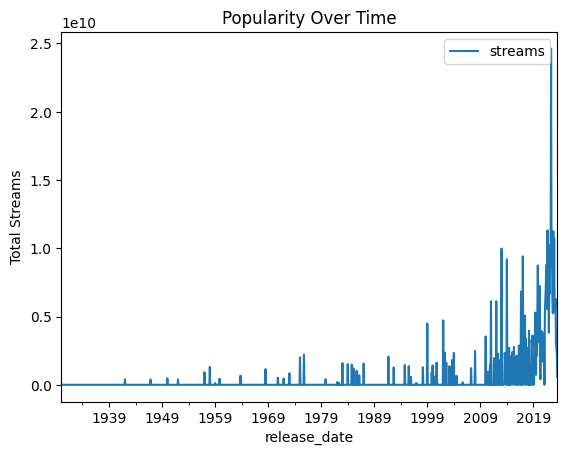

In [15]:
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str))
df.set_index('release_date', inplace=True)

df.resample('M')[['streams']].sum().plot()  # Summing streams monthly
plt.title('Popularity Over Time')
plt.ylabel('Total Streams')
plt.show()


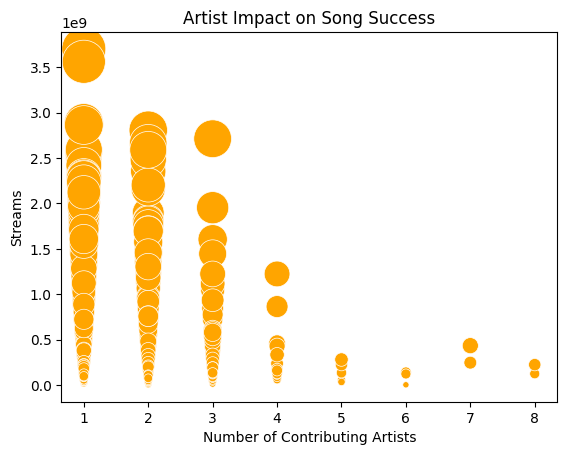

In [28]:
sns.scatterplot(data=df, x='artist_count', y='streams', size='streams', legend=False, sizes=(20, 1000), color='orange')
plt.title('Artist Impact on Song Success')
plt.xlabel('Number of Contributing Artists')
plt.ylabel('Streams')
plt.show()


In [2]:
import pandas as pd

# Specify the file path
file_path = "data/updated_file.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df['bpm'].unique()


array([125,  92, 138, 170, 144, 141, 148, 100, 130,  83, 150, 118, 174,
        89, 120,  78, 140, 123, 135, 133,  99, 107, 122, 204, 110, 126,
       168,  98,  97, 180,  96,  95,  90, 128,  79, 134, 186,  67, 106,
       171, 137, 101, 173, 198,  82,  81,  94, 124, 132, 131, 102, 142,
       116, 129, 172, 136,  88, 143, 112,  93, 206,  84, 158, 117, 114,
       108, 121, 127, 139, 162, 146, 115, 119,  80, 160, 192, 163, 154,
       104, 164, 145,  85, 166, 109, 157,  74, 105, 155, 149, 169,  91,
       202, 153, 178, 176, 111, 182, 175,  87,  76, 113,  77, 177, 147,
        75, 103, 151, 152,  65, 179,  86,  73, 181, 161,  72, 184,  71,
       189, 200, 196, 188, 156, 183, 165])

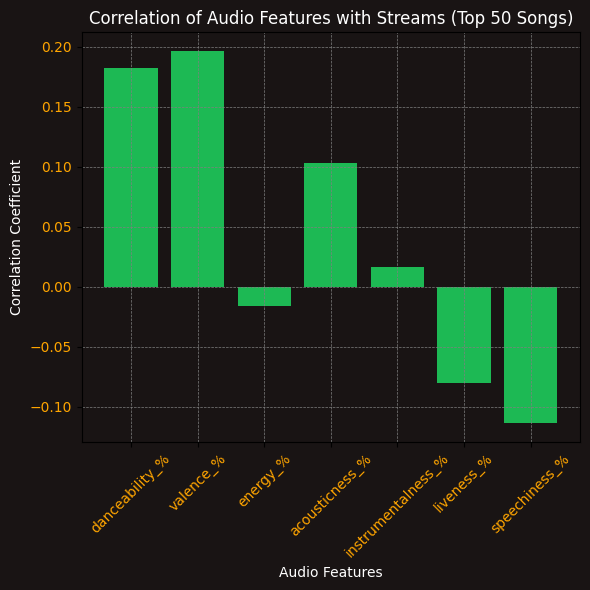

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "data.csv"
data = pd.read_csv("data/updated_file.csv")

# Sort the data by streams in descending order and select the top 50 songs
top_50 = data.sort_values(by='streams', ascending=False).head(50)

# Selecting the audio features
audio_features = ['danceability_%', 'valence_%', 'energy_%', 
                  'acousticness_%', 'instrumentalness_%', 
                  'liveness_%', 'speechiness_%']

# Calculating correlation between each audio feature and streams for the top 50 songs
correlation_values = {}
for feature in audio_features:
    correlation = top_50['streams'].corr(top_50[feature])
    correlation_values[feature] = correlation

# Plotting the correlation values as a bar chart
plt.figure(figsize=(6, 6), facecolor='#191414', edgecolor='#191414')  # Set background color to black
plt.bar(correlation_values.keys(), correlation_values.values(), color='#1DB954')
plt.title('Correlation of Audio Features with Streams (Top 50 Songs)', color='white')
plt.xlabel('Audio Features', color='white')
plt.ylabel('Correlation Coefficient', color='white')
plt.xticks(rotation=45, color='orange')  # Set x-axis label color to white
plt.yticks(color='orange')  # Set y-axis label color to white
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)  # Add gridlines with specific style
plt.gca().set_facecolor('#191414')
plt.tight_layout()
plt.show()


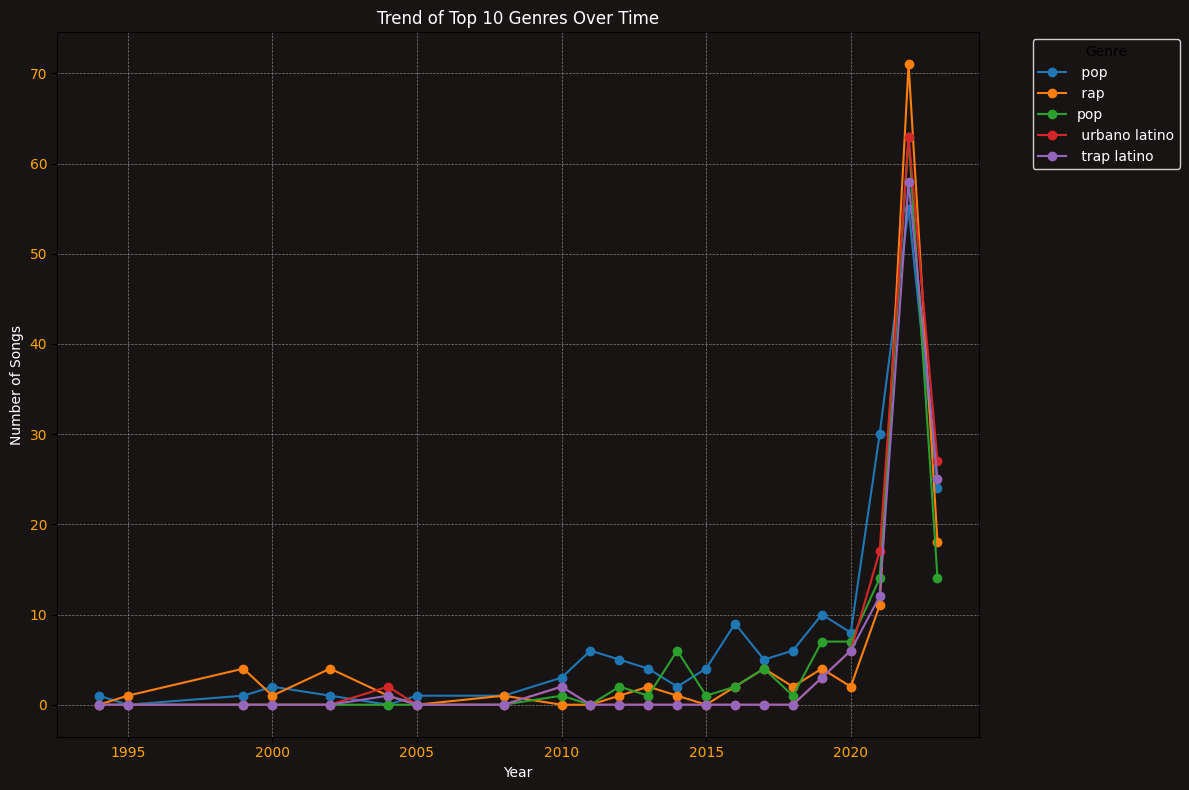

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv("data/updated_file.csv")

# Convert the genre string into a list of individual genres
data['genres'] = data['genre'].str.split(',')

# Create a new DataFrame where each row represents a single genre for each song
genre_data = data.explode('genres')

# Get the top 10 most common genres
top_genres = genre_data['genres'].value_counts().nlargest(5).index.tolist()

# Filter the genre data to include only the top 10 genres
genre_data_filtered = genre_data[genre_data['genres'].isin(top_genres)]

# Group the filtered data by genre and year, counting the number of occurrences of each genre in each year
genre_counts = genre_data_filtered.groupby(['genres', 'released_year']).size().unstack(fill_value=0)

# Plot the trend of top 10 genres over time as lollipop graph
plt.figure(figsize=(12, 8), facecolor='#191414', edgecolor='#191414')

for genre in top_genres:
    plt.plot(genre_counts.loc[genre], marker='o', label=genre)

plt.title('Trend of Top 10 Genres Over Time', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Songs', color='white')
plt.xticks(color='orange') 
plt.yticks(color='orange') 
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='#191414', edgecolor='white', labelcolor='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Add gridlines with specific style
plt.gca().set_facecolor('#191414')
plt.tight_layout()
plt.show()
